# Análise de Acidentes Aeronáuticos




**Nome:** Marcelo José Maturano

**Dataset:** [FAB Dataset](https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas-da-aviacao-civil-brasileira)


## 1. Definição do Problema



- **Descrição:** Este Dataset será explorado, após verificar-se um aumento expressivo no número de acidentes nos últimos anos, visto isto, surgiram as seguintes hipóteses, que será verificado com análise exploratória dos dados.

- **Tipo de problema:** Análise exploratória de dados (não supervisionado).

- **Hipóteses:**

* 1 - Os acidentes ocorrem por falha humana

* 2 -  Os fatores metereológicos contribuem para falhas humanas

* 3 - Algum tipo de aeronave que se destaca no número de acidentes

* 4 - Caso haja alguma aeronave específica, qual aeronave e qual tipo de falha

* 5 - Há como avaliar se a decorrência do tipo de falha está relacionada, devido algum problema na manutenção das aeronaves.


- **Restrições:** Foram utilizados apenas registros completos, com datas e identificação de modelo.
- **Atributos:** Descreva cada coluna relevante do seu DataFrame (ex: data, modelo, localização, etc.).

### Baixando arquivos






In [39]:
import gdown
url = "https://drive.google.com/drive/folders/1wdWK4E-QiOjynHtlCOanXJWTMpHPESgs?usp=drive_link"
pasta = gdown.download_folder(url)
pasta


Retrieving folder contents


Processing file 1aP0LRYgCPO-pMUm16-6a-ZjsWRHDP2kU ocorrencia.csv
Processing file 1yNKCCM4-nmcCVKJbe_PdzD3B-6aNgDxh ocorrencia_tipo.csv
Processing file 12W908dkhEZ1XxkbD-86WMb8VvOC7pY-U aeronave.csv
Processing file 1x9q1BOQBNnuiElG13XvyxX_KFhpMRFbS fator_contribuinte.csv
Processing file 1_V52HSPlx6rwbwdTX8MrVCqr0zKvC2Fj recomendacao.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1aP0LRYgCPO-pMUm16-6a-ZjsWRHDP2kU
To: /content/arquivos_fab/ocorrencia.csv
100%|██████████| 1.94M/1.94M [00:00<00:00, 97.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yNKCCM4-nmcCVKJbe_PdzD3B-6aNgDxh
To: /content/arquivos_fab/ocorrencia_tipo.csv
100%|██████████| 1.09M/1.09M [00:00<00:00, 78.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=12W908dkhEZ1XxkbD-86WMb8VvOC7pY-U
To: /content/arquivos_fab/aeronave.csv
100%|██████████| 2.43M/2.43M [00:00<00:00, 198MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x9q1BOQBNnuiElG13XvyxX_KFhpMRFbS
To: /content/arquivos_fab/fator_contribuinte.csv
100%|██████████| 729k/729k [00:00<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_V52HSPlx6rwbwdTX8MrVCqr0zKvC2Fj
To: /content/arquivos_fab/recomendacao.csv
100%|██████████| 1.37M/1.37M [00:00<00:

['/content/arquivos_fab/ocorrencia.csv',
 '/content/arquivos_fab/ocorrencia_tipo.csv',
 '/content/arquivos_fab/aeronave.csv',
 '/content/arquivos_fab/fator_contribuinte.csv',
 '/content/arquivos_fab/recomendacao.csv']

## 2. Análise Exploratória de Dados

### Importando o dataset para *análise*

In [40]:
import pandas as pd
df_ocorrencias = pd.read_csv(pasta[0],encoding="UTF-8",sep=";",low_memory=False)
df_ocorrencias_tipo = pd.read_csv(pasta[1],encoding="UTF-8",sep=";",low_memory=False)
df_fator_contribuinte = pd.read_csv(pasta[3],encoding="UTF-8",sep=";",low_memory=False)
df_aeronave = pd.read_csv(pasta[2],encoding="UTF-8",sep=";",low_memory=False)

### 2.1. **Estatísticas Iniciais**

#### Visualisando Colunas do Dataset

In [41]:
df_ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12876 entries, 0 to 12875
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               12876 non-null  int64 
 1   codigo_ocorrencia1              12876 non-null  int64 
 2   codigo_ocorrencia2              12876 non-null  int64 
 3   codigo_ocorrencia3              12876 non-null  int64 
 4   codigo_ocorrencia4              12876 non-null  int64 
 5   ocorrencia_classificacao        12876 non-null  object
 6   ocorrencia_latitude             10137 non-null  object
 7   ocorrencia_longitude            10137 non-null  object
 8   ocorrencia_cidade               12876 non-null  object
 9   ocorrencia_uf                   12876 non-null  object
 10  ocorrencia_pais                 12876 non-null  object
 11  ocorrencia_aerodromo            12876 non-null  object
 12  ocorrencia_dia                  12876 non-null

O Dataframe df_ocorrencias.info( ), nos dá visualização de valores faltantes que serão tratados, caso haja necessidade para a esclarecer nossas hipóteses, para que haja uma conclusão exata das premissas propostas para conclusão do problema.

In [42]:
df_ocorrencias_tipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         13576 non-null  int64 
 1   ocorrencia_tipo            13572 non-null  object
 2   ocorrencia_tipo_categoria  13572 non-null  object
 3   taxonomia_tipo_icao        13572 non-null  object
dtypes: int64(1), object(3)
memory usage: 424.4+ KB


O Dataframe df_ocorrencias_tipo, não há percentual expressivo de valores faltantes

### 2.2. Valores **Faltantes**

### Efetuando Limpeza de valores faltantes, na coluna/variável de interesse

In [43]:
ocorrencias_unicas = df_ocorrencias_tipo.ocorrencia_tipo_categoria.dropna().unique()

### 2.3. Estatísticas Descritivas

In [44]:
df_ocorrencias_tipo.ocorrencia_tipo_categoria.describe()

,ocorrencia_tipo_categoria
count,13572
unique,86
top,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
freq,2508


Devido termos 86 tipos de categoria, faz-se necessário um agrupamento, para identificar melhor os tipos de falha

In [45]:
df_fator_contribuinte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8515 entries, 0 to 8514
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   8515 non-null   int64 
 1   fator_nome           8515 non-null   object
 2   fator_aspecto        8515 non-null   object
 3   fator_condicionante  8515 non-null   object
 4   fator_area           8515 non-null   object
dtypes: int64(1), object(4)
memory usage: 332.7+ KB


### Identificando colunas para o **Pré-Processamento**

In [46]:
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12989 entries, 0 to 12988
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           12989 non-null  int64  
 1   aeronave_matricula           12988 non-null  object 
 2   aeronave_operador_categoria  12980 non-null  object 
 3   aeronave_tipo_veiculo        12988 non-null  object 
 4   aeronave_fabricante          12985 non-null  object 
 5   aeronave_modelo              12980 non-null  object 
 6   aeronave_tipo_icao           12979 non-null  object 
 7   aeronave_motor_tipo          12573 non-null  object 
 8   aeronave_motor_quantidade    12988 non-null  object 
 9   aeronave_pmd                 12988 non-null  float64
 10  aeronave_pmd_categoria       12988 non-null  float64
 11  aeronave_assentos            11864 non-null  float64
 12  aeronave_ano_fabricacao      12100 non-null  float64
 13  aeronave_pais_fa

## 3. Pré-processamento de Dados

### 3.1.Será realizada uma classificação dos tipos de ocorrência

###**Clusterização/Agrupamento

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(ocorrencias_unicas)
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(X)
agrupados = pd.DataFrame({'ocorrencia_tipo': ocorrencias_unicas, 'grupo': labels})
display(agrupados)


,ocorrencia_tipo,grupo
0,FALHA OU MAU FUNCIONAMENTO DO MOTOR,0
1,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,0
2,COLISÃO COM AVE,6
3,EXCURSÃO DE PISTA,4
4,COLISÃO NO SOLO,5
...,...,...
81,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,0
82,OUTROS | HIPÓXIA,2
83,OUTROS | COM LANÇAMENTO DE CARGA,2
84,***,4


Acima após a **Clusterização**, será realizado o mapeamento categorizado

In [48]:
mapa_categorias = {
    0: 'falha',
    1: 'fogo e fumaça',
    2: 'outros',
    3: 'segurança',
    4: 'genérico',
    5: 'solo',
    6: 'colisão'
}

agrupados['categoria'] = agrupados['grupo'].map(mapa_categorias)
agrupados.rename(columns={'ocorrencia_tipo': 'ocorrencia_tipo_categoria'}, inplace=True)
display(agrupados)

,ocorrencia_tipo_categoria,grupo,categoria
0,FALHA OU MAU FUNCIONAMENTO DO MOTOR,0,falha
1,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,0,falha
2,COLISÃO COM AVE,6,colisão
3,EXCURSÃO DE PISTA,4,genérico
4,COLISÃO NO SOLO,5,solo
...,...,...,...
81,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,0,falha
82,OUTROS | HIPÓXIA,2,outros
83,OUTROS | COM LANÇAMENTO DE CARGA,2,outros
84,***,4,genérico


### Visualisando os tipos de ocorrências

In [49]:
display(df_ocorrencias_tipo)


,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,86683,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP
1,86682,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,86678,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
3,86677,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
4,86676,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
...,...,...,...,...
13571,28377,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
13572,28375,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL
13573,28355,FALHA ESTRUTURAL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
13574,28335,VOO CONTROLADO CONTRA O TERRENO,VOO CONTROLADO CONTRA O TERRENO,CFIT


### Fazendo um Merge, para categorizar as ocorrências

In [50]:
df_ocorrencias_agrupado = pd.merge(df_ocorrencias_tipo, agrupados, on="ocorrencia_tipo_categoria", how="left")
df_ocorrencias_agrupado
display(df_ocorrencias_agrupado)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,grupo,categoria
0,86683,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,0.0,falha
1,86682,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0,falha
2,86678,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0,falha
3,86677,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,6.0,colisão
4,86676,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE,4.0,genérico
...,...,...,...,...,...,...
13571,28377,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,0.0,falha
13572,28375,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,6.0,colisão
13573,28355,FALHA ESTRUTURAL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0,falha
13574,28335,VOO CONTROLADO CONTRA O TERRENO,VOO CONTROLADO CONTRA O TERRENO,CFIT,4.0,genérico


### Analisando a proporção de categoria das ocorrências

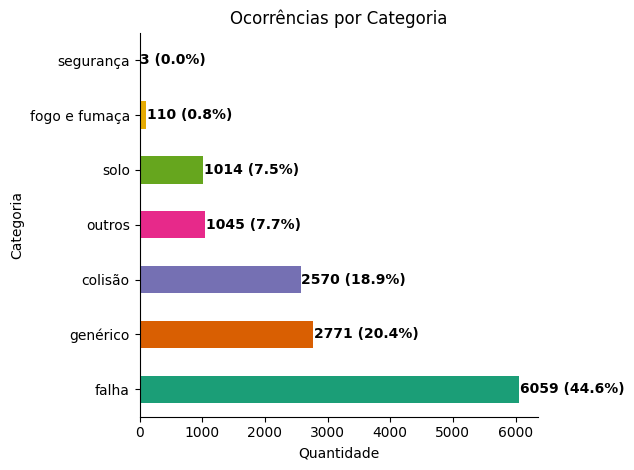

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

contagem = df_ocorrencias_agrupado['categoria'].value_counts()
total = contagem.sum()

ax = contagem.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.title('Ocorrências por Categoria')


for i, v in enumerate(contagem):
    percentual = 100 * v / total
    ax.text(v + 10, i, f"{v} ({percentual:.1f}%)", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Através do Gráfico: Ocorrências por Categoria, é possível visualizar que o maior número de ocorrências ocorreram por " Falha"

O genérico é uma classificação criada para para atender as ocorrência por classificação adversas.

### Entendendo o tipo de "Falha"

In [52]:
df_falhas = df_ocorrencias_agrupado[df_ocorrencias_agrupado["categoria"] == "falha"]
display(df_falhas)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,grupo,categoria
0,86683,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,0.0,falha
1,86682,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0,falha
2,86678,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0,falha
5,86676,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0,falha
7,86672,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0,falha
...,...,...,...,...,...,...
13562,28617,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,0.0,falha
13567,28437,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,0.0,falha
13568,28395,FALHA ESTRUTURAL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0,falha
13571,28377,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,0.0,falha


/tmp/ipython-input-53-2683198366.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


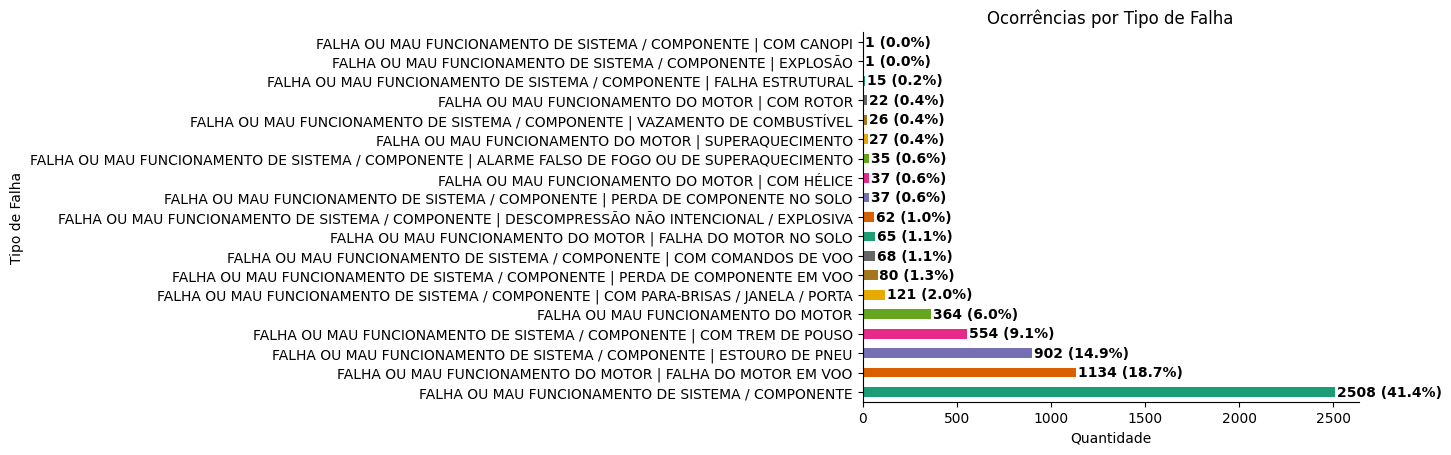

In [53]:
contagem = df_falhas['ocorrencia_tipo_categoria'].value_counts()
total = contagem.sum()

ax = contagem.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Falha')
plt.title('Ocorrências por Tipo de Falha')

for i, v in enumerate(contagem):
    percentual = 100 * v / total
    ax.text(v + 10, i, f"{v} ({percentual:.1f}%)", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Através deste gráfico, podemos identificar que a maioria das ocorrência, acontecem por falha de mau funcionamento de Sistema/Componente

### Unindo os Tipos de "Falha" , com os modelos de Aeronaves

In [54]:
  df_falhas = df_falhas.copy()
  df_falhas.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia'}, inplace=True)
  df_aeronave.rename(columns={'codigo_ocorrencia2': 'codigo_ocorrencia'}, inplace=True)

  df_falhas_aeronave = pd.merge(df_falhas, df_aeronave, on="codigo_ocorrencia", how="left")
  df_falhas_aeronave_filtrado = df_falhas_aeronave[['codigo_ocorrencia','ocorrencia_tipo_categoria','aeronave_tipo_veiculo','aeronave_tipo_operacao','aeronave_fabricante','categoria']].copy()
  display(df_falhas_aeronave_filtrado)

,codigo_ocorrencia,ocorrencia_tipo_categoria,aeronave_tipo_veiculo,aeronave_tipo_operacao,aeronave_fabricante,categoria
0,86683,FALHA OU MAU FUNCIONAMENTO DO MOTOR,AVIÃO,EXPERIMENTAL,JADER ROCHA DUTRA,falha
1,86682,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,HELICÓPTERO,POLICIAL,EUROCOPTER,falha
2,86678,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,HELICÓPTERO,TÁXI AÉREO,SIKORSKY,falha
3,86676,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AVIÃO,TÁXI AÉREO,BEECH AIRCRAFT,falha
4,86672,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AVIÃO,PRIVADA,CESSNA AIRCRAFT,falha
...,...,...,...,...,...,...
6055,28617,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,AVIÃO,TÁXI AÉREO,TWIN COMMANDER,falha
6056,28437,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,AVIÃO,PRIVADA,PIPER AIRCRAFT,falha
6057,28395,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,AVIÃO,PRIVADA,NEIVA INDUSTRIA AERONAUTICA,falha
6058,28377,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,AVIÃO,PRIVADA,CESSNA AIRCRAFT,falha


### Unindo: Falhas dos veículos/aeronaves com os fatores

In [55]:
df_falhas_fatores = pd.merge(
    df_falhas_aeronave_filtrado,
    df_fator_contribuinte,
    left_on='codigo_ocorrencia',
    right_on='codigo_ocorrencia3',
    how='left'
)

### Analisando o Tipo de Veículo, com a quantidade de Falhas

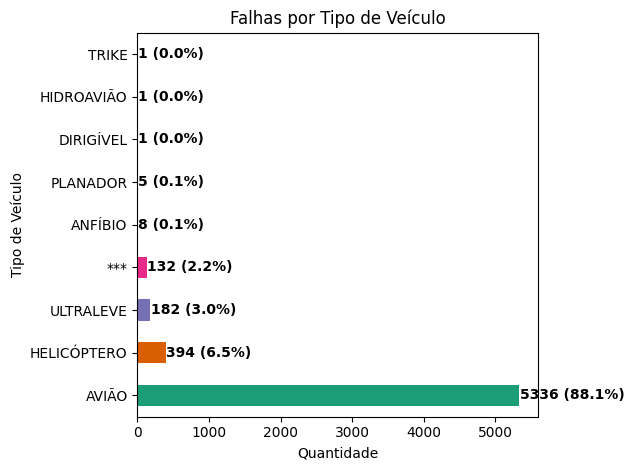

In [56]:
contagem_veiculo = df_falhas_aeronave_filtrado['aeronave_tipo_veiculo'].value_counts()
ax = contagem_veiculo.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Falhas por Tipo de Veículo')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Veículo')

for i, v in enumerate(contagem_veiculo):
    percentual = 100 * v / contagem_veiculo.sum()
    ax.text(v + 5, i, f"{v} ({percentual:.1f}%)", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

Pode-se observar através deste gráfico, que o maior número de falhas, ocorrem em **Avião/Aviões***

### Plotando o fator Falha por Tipo de Veículo/Aeronave

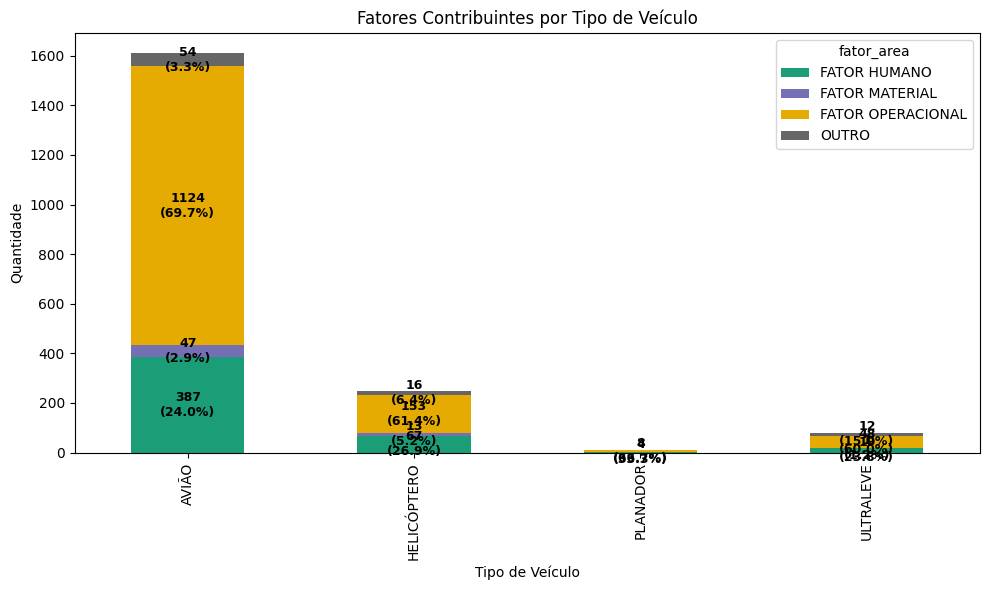

In [57]:
crosstab = pd.crosstab(df_falhas_fatores['aeronave_tipo_veiculo'], df_falhas_fatores['fator_area'])

ax = crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Dark2')
plt.title('Fatores Contribuintes por Tipo de Veículo')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Quantidade')
plt.tight_layout()


for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        total = crosstab.iloc[i % crosstab.shape[0]].sum()
        percentual = 100 * height / total if total > 0 else 0
        ax.text(x + width/2, y + height/2,
                f"{int(height)}\n({percentual:.1f}%)",
                ha='center', va='center', fontsize=9, color='black', fontweight='bold')

plt.show()

Visualizando este gráfico, pode-se verificar que o maior número de Falhas ocorrem em Avião, e o tipo de Falha com maior percentual é Falha Operaional

### Unindo Fatores Falhas com os Fatores Contribuintes

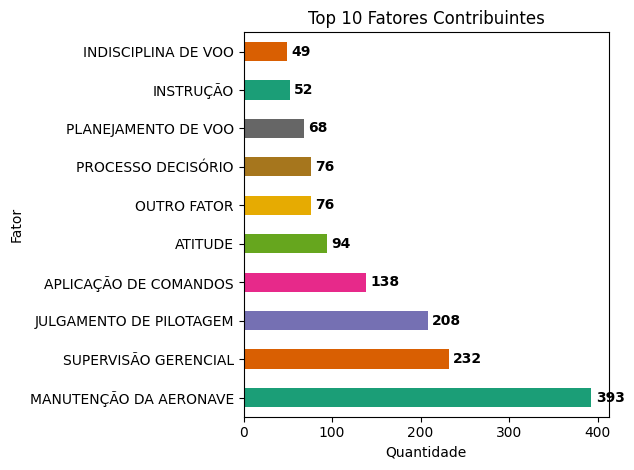

In [58]:
top_fatores = df_falhas_fatores['fator_nome'].value_counts().head(10)
ax = top_fatores.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Top 10 Fatores Contribuintes')
plt.xlabel('Quantidade')
plt.ylabel('Fator')
for i, v in enumerate(top_fatores):
    ax.text(v + 5, i, f"{v}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

Attravés deste gráfico, pode-se afirmar que o **maior** Número de falhas, ocorre devido a falta de **Manutenção da Aeronave**

### Visualizando os Aspectos dos Fatores Contribuintes

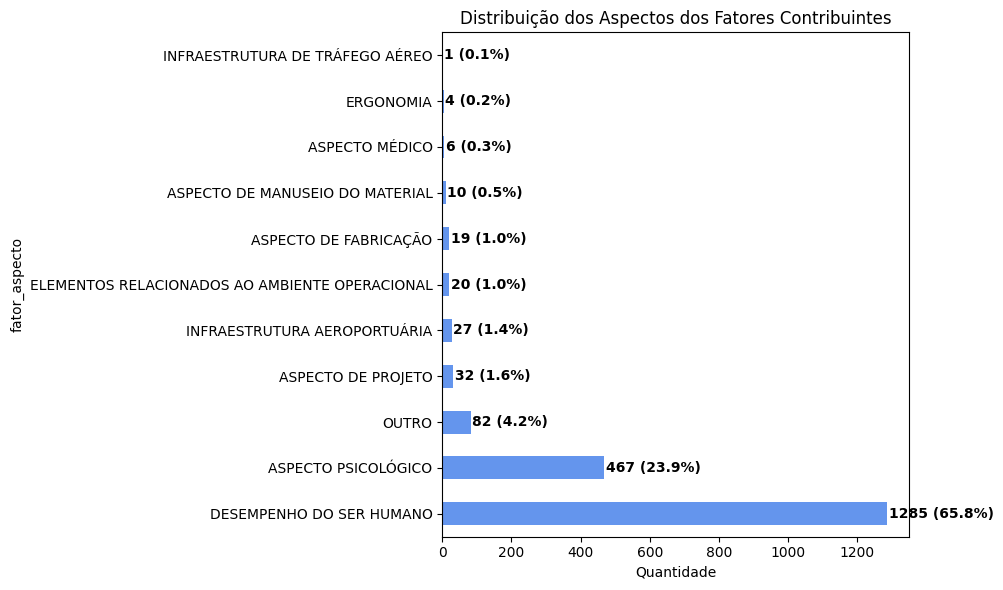

In [59]:
import matplotlib.pyplot as plt

contagem = df_falhas_fatores['fator_aspecto'].value_counts()
total = contagem.sum()

ax = contagem.plot(kind='barh', color='cornflowerblue', figsize=(10,6))
plt.title('Distribuição dos Aspectos dos Fatores Contribuintes')
plt.xlabel('Quantidade')

# Adiciona rótulo com valor e percentual
for i, v in enumerate(contagem):
    percentual = 100 * v / total
    ax.text(v + 5, i, f"{v} ({percentual:.1f}%)", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Pode-se observar como Fatores *Contribuintes*/Secundário, o desempenho do ser humano.

##4. Modelo de Previsão

Importando Bibliotecas de previsão/predição

Divisão em treino e teste


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


##### Seleção das colunas principais

In [61]:
colunas = [
    'aeronave_tipo_veiculo', 'aeronave_tipo_operacao',
    'aeronave_fabricante', 'ocorrencia_tipo_categoria', 'fator_nome', 'fator_area'
]
df_model = df_falhas_fatores[colunas].dropna()

#### Simplificação dos fatores
Filtro valores que não serão irrelevantes para o modelo

In [62]:
freq = df_model['fator_nome'].value_counts()
top_fatores = freq[freq > 50].index
df_model['fator_nome_simplificado'] = df_model['fator_nome'].apply(
    lambda x: x if x in top_fatores else 'OUTRO'
)


#### Remove outro
 Removendo valores que não interessam

In [63]:
df_sem_outro = df_model[df_model['fator_nome_simplificado'] != 'OUTRO']

# X e y
X = df_sem_outro.drop(['fator_nome', 'fator_nome_simplificado'], axis=1)
y = df_sem_outro['fator_nome_simplificado']
X = pd.get_dummies(X)

####TREINAMENTO DO MODELO

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred))


                         precision    recall  f1-score   support

  APLICAÇÃO DE COMANDOS       0.20      0.19      0.19        47
                ATITUDE       0.38      0.33      0.36        24
              INSTRUÇÃO       0.00      0.00      0.00        16
JULGAMENTO DE PILOTAGEM       0.21      0.22      0.21        72
 MANUTENÇÃO DA AERONAVE       0.30      0.22      0.26       116
            OUTRO FATOR       1.00      1.00      1.00        24
    PLANEJAMENTO DE VOO       0.07      0.14      0.09        22
     PROCESSO DECISÓRIO       0.27      0.32      0.29        19
   SUPERVISÃO GERENCIAL       0.11      0.10      0.10        62

               accuracy                           0.24       402
              macro avg       0.28      0.28      0.28       402
           weighted avg       0.26      0.24      0.25       402



###MATRIZ DE CONFUSÃO

In [65]:
labels = sorted(y_test.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

### Mapeamento de fator para área

### Usa os dados do dataframe de teste para garantir correspondência

In [66]:
fator_area_dict = df_sem_outro.drop_duplicates('fator_nome_simplificado').set_index('fator_nome_simplificado')['fator_area'].to_dict()

#### Heatmap com **cores por área**

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'APLICAÇÃO DE COMANDOS'),
  Text(0, 1.5, 'ATITUDE'),
  Text(0, 2.5, 'INSTRUÇÃO'),
  Text(0, 3.5, 'JULGAMENTO DE PILOTAGEM'),
  Text(0, 4.5, 'MANUTENÇÃO DA AERONAVE'),
  Text(0, 5.5, 'OUTRO FATOR'),
  Text(0, 6.5, 'PLANEJAMENTO DE VOO'),
  Text(0, 7.5, 'PROCESSO DECISÓRIO'),
  Text(0, 8.5, 'SUPERVISÃO GERENCIAL')])

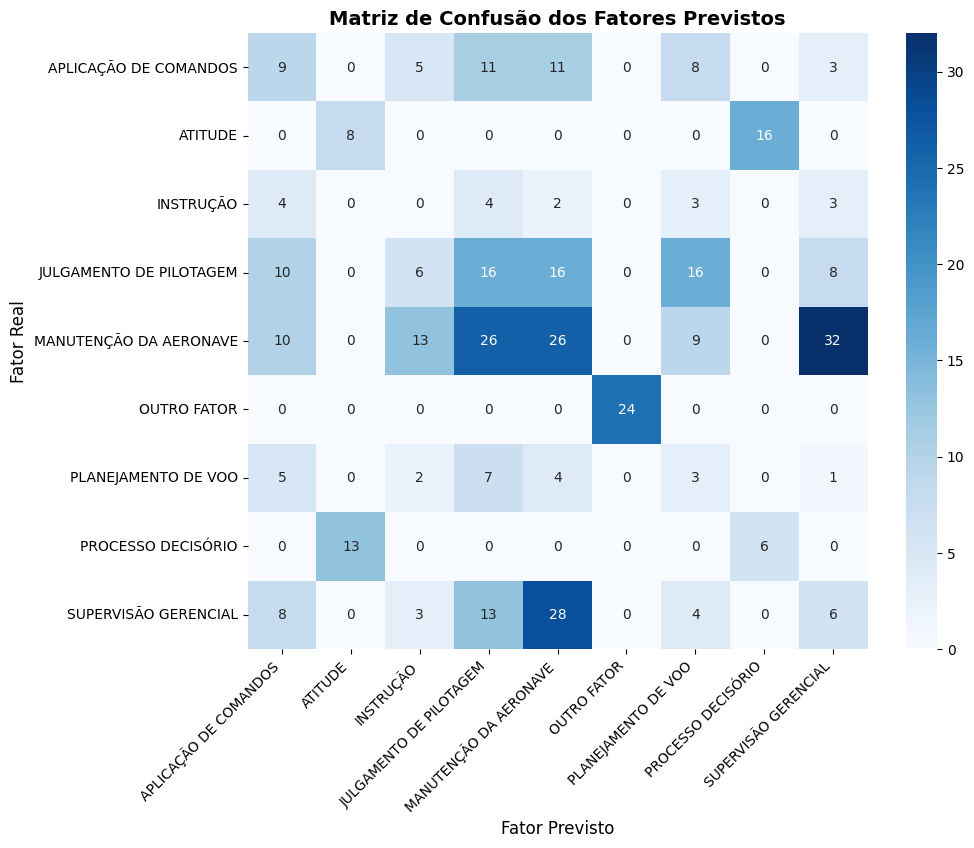

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão dos Fatores Previstos', fontsize=14, weight='bold')
plt.xlabel('Fator Previsto', fontsize=12)
plt.ylabel('Fator Real', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)


Baseado no mapa de calor de previsão do modelo de teste, é possível confirmar que a propabilidade de ocorrer um próximo acidente por falta de manutenção é maior que outros fatores

##5. Conclusão

A análise dos dados de acidentes aeronáuticos no Brasil mostrou que falhas de manutenção mecânica continuam sendo uma das principais causas desses eventos.
Após o tratamento dos dados, análise exploratória dos dados deste Dataset FAB, foi possível concluir que dentre as hipóteses levantadas inicialmente, por todos os resultados das análises que a maior causa dos acidentes aéreos, ocorre por **falha** na manutenção das aeronaves. Ainda vale ressaltar que após análise preditiva feita através do gráfico de confusão foi confirmada a que a falha na manutenção continuara sendo a principal causa de acidentes aéreos.

### Checklist

### Definição do problema
**Objetivo:** entender e descrever claramente o problema que está sendo resolvido.

- **Qual é a descrição do problema?**  
  O problema consiste em analisar os acidentes aeronáuticos no Brasil, buscando entender fatores, padrões e possíveis causas por trás desses acidentes, usando dados históricos de ocorrências.

- **Este é um problema de aprendizado supervisionado ou não supervisionado?**  
  Atualmente, o foco está em análise exploratória de dados (EDA). Se avançar para machine learning, o problema poderia ser tratado como supervisionado (por exemplo, previsão do tipo de acidente) ou não supervisionado (descoberta de padrões ou clusters).

- **Que premissas ou hipóteses você tem sobre o problema?**  
  Supõe-se que fatores como tipo de aeronave, localidade, ano e área do fator contribuinte podem influenciar a ocorrência e gravidade dos acidentes.  
  Hipótese: Determinados tipos de aeronaves ou regiões apresentam maior incidência de acidentes devido a fatores operacionais, ambientais ou humanos.

- **Que restrições ou condições foram impostas para selecionar os dados?**  
  Os dados utilizados são de acidentes aeronáuticos, filtrados para remover informações ausentes/redundantes, e apenas campos relevantes são mantidos. Exemplo: filtragem por ano ou tipo de ocorrência para análises específicas.

- **Defina cada um dos atributos do dataset.**  
  Os principais atributos trabalhados foram:  
  - `aeronave_tipo_veiculo`: tipo da aeronave (ex: avião, helicóptero)  
  - `fator_area`: área relacionada ao fator contribuinte (ex: operação, manutenção)  
  - `fator_nome`: nome do fator contribuinte  
  - `ocorrencia_uf`: estado da ocorrência  
  - `ocorrencia_classificacao`: classificação da ocorrência  
  - `ocorrencia_tipo`: tipo da ocorrência/acidente  
  - `ocorrencia_dia`: data da ocorrência  
  - `ano`: ano da ocorrência  
  - Outros campos derivados ou específicos podem ser analisados conforme as necessidades

---

### Análise de dados
**Objetivo:** entender a informação disponível.

#### Estatísticas descritivas:
- **Quantos atributos e instâncias existem?**  
  Após o carregamento e filtragem, o dataframe principal possui cerca de 10-15 atributos principais e milhares de linhas (instâncias de acidentes).

- **Quais são os tipos de dados dos atributos?**  
  Os atributos são do tipo string (objetos), inteiro (int), float (float64) e datas (datetime).

- **Verifique as primeiras linhas do dataset. Algo chama a atenção?**  
  Sim, existem muitos valores nulos em algumas colunas, repetições de fatores para uma mesma ocorrência e uma variabilidade grande de categorias em campos como `fator_area` e `fator_nome`.

- **Há valores faltantes, discrepantes ou inconsistentes?**  
  Sim, há muitos valores faltantes (NaN) em vários campos. Alguns valores podem ser padronizados (ex: nomes de áreas ou tipos), mas nada muito discrepante visualmente além dos nulos.

- **Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?**  
  O notebook faz uso de `.describe()`, mostrando média, desvio padrão, mínimo, máximo e quartis de colunas como ano e eventualmente outros campos numéricos. A maioria dos atributos numéricos é de contagem ou datas, e não aparecem outliers extremos. Valores ausentes são frequentes em vários campos (principalmente em fatores associados ao acidente).

#### Visualizações:
- **Verifique a distribuição de cada atributo. O que você percebe?**  
  - **Ano**: Distribuição desigual, com picos em anos mais recentes devido à melhoria no registro dos dados.  
  - **Tipo de aeronave**: Alguns modelos são muito mais frequentes, mostrando concentração de acidentes em determinados tipos.  
  - **Fator área**: Algumas áreas, como "Operação" e "Manutenção", aparecem com mais frequência.  
  Essas distribuições sugerem a necessidade de eventualmente agrupar ou filtrar por categorias principais.

- **Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe?**  
  Para classificação de ocorrência (ex: grave, leve, incidente), nota-se desbalanceamento entre as classes (ex: acidentes graves são minoria).

- **Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.**  
  Foram utilizados gráficos de barras, pizza, heatmaps e countplots para explorar relações como tipo de aeronave vs. tipo de ocorrência, fator por área, etc. Heatmaps permitiram observar correlações e incidências conjuntas de fatores.

---

### Pré-processamento de dados
**Objetivo:** realizar operações de limpeza, tratamento e preparação dos dados.

- **Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).**  
  Remoção de duplicatas, remoção/substituição de valores faltantes em campos críticos, normalização de nomes e categorias para evitar discrepâncias (ex: padronizar `fator_area`). Eventual discretização de valores numéricos (ex: faixas de ano), conversão de campos de data para datetime. Em certos momentos, foi feita padronização ou transformação de texto (strip, lower, etc).

- **Trate (removendo ou substituindo) os valores faltantes (se existentes).**  
  Na maioria dos casos, os valores ausentes foram removidos, principalmente quando prejudicavam as análises. Em alguns casos, pode ser interessante substituir por categorias “Desconhecido” ou “Outro”.

- **Realize outras transformações de dados porventura necessárias.**  
  Criação de variáveis categóricas ou derivadas, como “ano” a partir da data; agrupamento por categorias principais para simplificar as análises e evitar sparsidade; eventual one-hot-encoding pode ser considerado se for aplicar modelos de ML.

- **Explique, passo a passo, as operações realizadas, justificando cada uma delas.**  
  1. Leitura e inspeção do dataset: carregamento, visualização de head, tipos de dados e valores ausentes.  
  2. Filtragem e limpeza: remoção de registros incompletos ou não relevantes.  
  3. Padronização e tratamento de categorias: padronização textual e agrupamento de fatores semelhantes.  
  4. Análise exploratória: geração de gráficos, tabelas cruzadas e análise de frequência.  
  5. Preparação para modelagem (se aplicável): consideração de normalização, padronização, etc.

- **Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.**  
  Sim, é recomendável. Após padronizações e tratamento de valores ausentes, a análise dos gráficos pode revelar novos padrões ou relações, como clusters mais claros, redução de outliers ou melhor balanceamento das classes.
